# OpenIntro Statistics Notes
https://www.amazon.com/OpenIntro-Statistics-Third-David-Diez/dp/194345003X

In [2]:
%%html
<style>
table {float:left}
</style>

In [9]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Frequently used characters
(for copying and pasting)

| symbol | definition |
|--------|------------|
| μ | population mean |
| σ<sup>2</sup> | population variance |
| σ | standard deviation |
| x̅ | sample mean |
| s<sup>2</sup> | sample variance |
| s | sample standard deviation |
| χ | chi |
| β | beta |

## Chapter 1 - Introduction

### Definitions
**Confounding Variable**: a variable which is correlated with both explanatory and response variables. e.g., `gender`[1] in a test to determine if a `drug`[2] leads to `recovery`[3].

1: confounding variable    
2: explanatory variable    
3: response variable    

#### Sampling Methods

**Simple random sampling**: Lottery-style random sampling.    
**Stratified random sampling**: Population is divided into groups/strata based on similar characteristics, then randomly sampled from each strata.    
**Clustered random sampling**: Population is divided into many groups/clusters, then we choose a fixed number of clusters and use all samples from those selected clusters.    
**Multistage random sampling**: Like clustered random sampling, but choose samples at random from clusters instead of using all samples from selected clusters.

**Point Estimate**: A sample value used to estimate that respective value for the entire population. e.g., the sample mean is a point estimate of the population mean.

**Standard Deviation**: A description of how far away a typical observation is from the mean. Useful when considering how close the data are to the mean.
**Variance**: The squared value of the standard deviation. The averaged square distance from the mean.

### Notes

* The median and IQR are called **robust estimates** because outliers have little effect on their values. The mean and standard deviation are much more affected by outliers.

## Chapter 2 - Probability

### Definitions

**Probability**: The proportion of times the outcome would occur if we observed the random process an infinite number of times.    
**Law of Large Numbers**: As more observations are collected, the proportion of occurences with a particular outcome converges to the probability of that outcome.    
**Sample Space**: The set of all possible outcomes of an event    
**Probability Distribution**: A table of all disjoint outcomes and their associated probabilities:    

| Dice Sum | Probability |
|----------|-------------|
| 2 | 1/36 |
| 3 | 2/36 |
| 4 | 3/36 |
| 5 | 4/36 |
| 6 | 5/36 |
| 7 | 6/36 |
| 8 | 5/36 |
| 9 | 4/36 |
| 10 | 3/36 |
| 11 | 2/36 |
| 12 | 1/36 |


### Notes

* The probability that one of `k` multiple disjoint/mutually exclusive events `Ak` occur is `P(A1)+P(A2)+...+P(Ak)`
  - e.g., Probability of rolling a 1 or 2 on a die => `P(1 or 2) = P(1) + P(2) = 1/6 + 1/6 = 1/3`

* If `A` and `B` are any two events, disjoint or not, then the probability that at least one of them will occur is:    
`P(A or B) = P(A) + P(B) - P(A and B)`

* The **Complement** of a sample space `D` is the set of all outcomes not in `D`. Denoted `D`<sup>`c`</sup>    

* If `A` and `B` represent events from independent processes, then the probability that both events will occur is: `P(A and B) = P(A) x P(B)`

* A probability based on a single variable is called a **Marginal Probability**. e.g., `P(teen went to college)`

* A probability based on more than one variables is called a **Joint Probability**. e.g, `P(teen went to college and parent not)`

#### Conditional Probability
* The conditional probability of the outcome of interest A given condition B is:    
$$ P(A|B) = \frac{P(A and B)}{P(B)} $$

#### Random Variables
* A variable or process with a numerical outcome. Usually denoted by a capital letter (X, Y, Z). e.g., the amount a single student will spend on textbooks.

* The **Expected Outcome** E(X) or μ of a random variable is the sum of all outputs multiplied by their probabilities:
$$ E(X) = μ = \sum_{i=1}^k x_i P(X=x_i) $$

#### Continuous Distributions
* A **Probability Density Function** is a curve that represents where outcomes of events are likely to occur. In other words, it's a fine-grain histogram of probabilities. The area under a PDF is equal to 1.

## Chapter 3 - Distributions of random variables

### Definitions

### Notes

#### Normal Distribution
* Symmetric, unimodal, bell-shaped curve

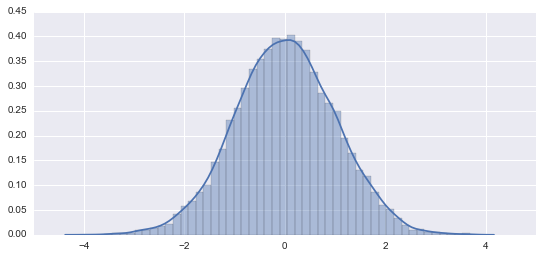

In [35]:
# Normal Distribution
sns.set(rc={"figure.figsize": (9, 4)})
mu, sigma = 0, 1
x = np.random.normal(mu, sigma, 10000)
sns.distplot(x)

#### Z-scores
* The **Z-score** of an observation is the number of standard deviations it lies from the mean. e.g., if a data point / observation is 1 standard deviation above the mean, its z-score is +1.
$$ Z = \frac{x - μ}{σ} $$

#### Geometric Distribution
* When an individual trial only has two possible outcomes (i.e., `success` or `failure`), it is called a **Bernoulli random variable**.
* If you label a `success` as `p` and a `failure` as `q`, then X is a Bernoulli random variable with mean $ μ = p $ and standard deviation $ σ = \sqrt{p(1-p)} $.    
* **Geometric Distribution**:
  * A distribution that describes the waiting time until a `success` for **independent and identically distributed (iid)** Bernoulli random variables. i.e., `P(nth trial is success) = P(all n-1th trials are failures)`.
  * The probability of finding the first `success` in the `nth` trial is given by: $ (1-p)^{n-1}p $
  * $ μ = \frac{1}{p} $
  * $ σ^2 = \frac{1-p}{p^2} $
  * $ σ = \sqrt{\frac{1-p}{p^2}} $

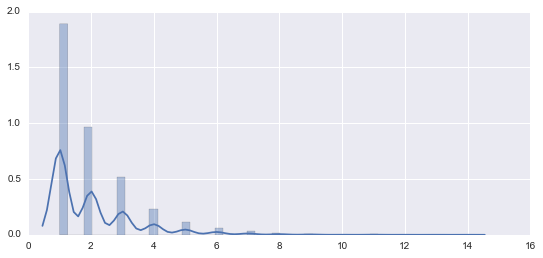

In [47]:
# Geometric Distribution
x = np.random.geometric(p=0.5, size=5000)
sns.distplot(x)

#### Binomial Distribution
* If the probability of a single `success` trial is `p`, then the probability of observing `k` successes in `n` independent trials is $ { n \choose k}p^k(1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k} $
* $ μ = np $
* $ σ^2 = np(1-p) $
* $ σ = \sqrt{np(1-p)} $

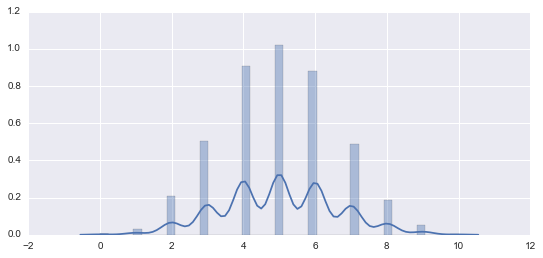

In [52]:
# Binomial Distribution
x = np.random.binomial(n=10, p=0.5, size=5000)
sns.distplot(x)

#### Poisson Distribution
* Useful for estimating the number of events in a large population over a unit of time.
* The **rate** `λ` for a Poisson Distribution is the average number of occurences in a mostly fixed population per unit of time.
* `P(observe k events) =` $ \frac{λ^ke^{-λ}}{k!} $ where `k ∈ Z`
* $ μ = λ $
* $ σ^2 = λ $
* $ σ = \sqrt{λ} $

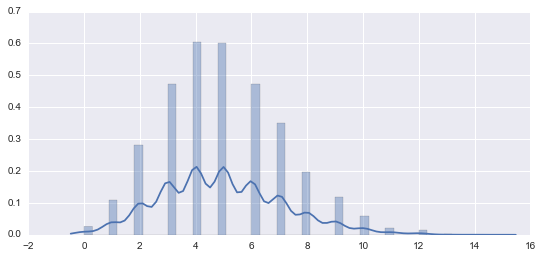

In [54]:
# Poisson Distribution
x = np.random.poisson(5, size=10000)
sns.distplot(x)

## Chapter 4 - Foundations for inference

### Notes

* Statistical inference is concerned primarily with understanding the quality of parameter estimates. e.g., how certain are we that the estimated mean x̅ is near the population mean μ?

#### Sampling Distribution
* Take a sample of size `n` from a population `m` times and create a distribution of means. e.g., assume a large population; take a sample of 100 students and find their mean height; do this 1000 times and create a histogram/distribution chart.
* The standard deviation of this distribution describes the typical error of the point estimate means, and we call this standard deviation the **standard error (SE)** of the estimate.
* You can find the standard error from just a single point estimate, however, with $ SE_\overline{x} = σ_\overline{x} = \frac{σ}{\sqrt{n}} \approx \frac{s}{\sqrt{n}} $

#### Confidence Intervals
* Point estimates are cool, but they usually have an error to them. We can get a better idea of an estimate by finding a _range of values_ instead of just a point.
* A plausible range of values for the population parameter is called a **confidence interval**.
* "The standard error represents the standard deviation associated with the estimate, and roughly 95% of the time the estimate will be within 2 standard errors of the population parameter. If the interval spreads out 2 standard errors from the point estimate, we can be roughly 95% **confident** that we have captured the true parameter: `point estimate ± 2 * SE`"
* Correct interpretation of a CI: "We are XX% sure that the population parameter is between ..."
* Incorrect interpretation of a CI: "We have found the population parameter with a certain probability XX%"

#### Hypothesis Testing
* **Null Hypothesis $ (H_0) $**: Often represents a skeptical position or a perspective of no difference.
* **Alternative Hypothesis $ (H_A) $ **: Often represents a new perspective, such as the possibility that there has been a change.
* tl;dr the skeptic will not reject the null hypothesis unless the evidence in favor of the alternative hypothesis is very strong
* Even if we fail to reject the null hypothesis, we typically do not accept the null hypothesis as true.
* We call the value of the null hypothesis the **null value**.
* There are 4 possible outcome scenarios for a hypothesis test:

| Truth | do not reject $H_0$ | reject $H_0$ |
|-------|---------------------|--------------|
| $H_0$ true | okay | Type 1 error |
| $H_A$ true | Type 2 error | okay |
<br /><br /><br /><br />
* **Type 1 error**: Rejecting the null hypothesis when $H_0$ is actually true.
* **Type 2 error**: Failing to reject the null hypothesis when the alternative is actually true.
* As a general rule of thumb, when the null hypothesis is actually true, we do not want to incorrectly reject $H_0$ more than 5% of the time. This corresponds to a **significance level** of `α = 0.05`.    
* The **p-value** is a way of quantifying the strength of the evidence against the null hypothesis and in favor of the alternative. It is the probability of observing data at least as favorable to the alternative hypothesis as our current data set, if the null hypothesis is true.
* When you are interested in checking for an increase or decrease, but not both, use a **one-sided test**. When you are interested in any difference from the null value, use a **two-sided test**.
* **Central Limit Theorem**: The approximation of $\bar{x}$ improves with larger samples sizes.    
* **Test statistic**: a data summary that is useful for computing the p-value and evaluating the hypothesis test. e.g., Z-score, t-score.

## Chapter 5 - Inference for numerical data

### Notes    

#### T-distribution
* The **t-distribution** is useful for when you have a small sample size (generally <30).
* The t-distribution has a single parameter: **degrees of freedom**, which describe the precise form of the bell-shaped t-distribution.
* The larger the degrees of freedom (df), the more the t-distribution resembles the normal distribution.
* Use a df value of `n-1`, e.g., with 19 samples, `19-1 = 18` degrees of freedom.
* With a t-distribution, we use a **T-score**, which is computed in the same way as a Z-score and represents the same idea.

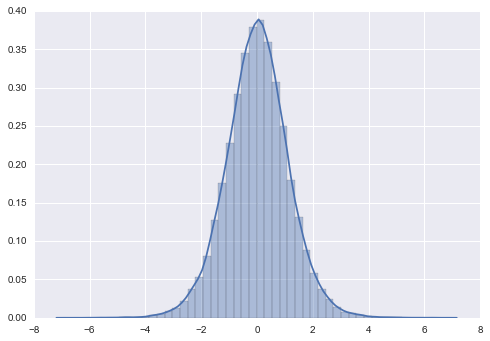

In [6]:
# t Distribution
x = np.random.standard_t(10, size=100000)
sns.distplot(x)

#### Paired data
* Two sets of observations/data are paired if each observation in one set has a special correspondence or connection with exactly one observation in the other data set.
* Analyzing a paired data set involves analyzing the difference between each corresponding observation. e.g., find $\bar{x}_{diff}$, $n_{diff}$, $s_{diff}$, etc summary statistics

#### Comparing many means with ANOVA
* ANalysis Of VAriance
* Uses the **F test**.
* Uses a single hypothesis test to check whether the means across many groups are equal.
* Example hypothesis test setup:
  * $H_0$: The mean outcome is the same across all groups. i.e., $μ_1 = μ_2 = ... = μ_k$ for `k` groups
  * $H_A$: At least one mean is different
* Here we simultaneously consider many groups and evaluate whether their sample means differ more than we would expect. This variability is called **mean square between groups (MSG)**.
* Mean square between groups (MSG) has an associated degress of freedom of $df_G = k-1$ with `k` groups.
* Calculating MSG is a bit of a pain in the ass, so we generally use software to do this instead.
* We generate an estimate of the level of variability called **mean square error (MSE)** as a baseline to compare against the MSG, with degrees of freedom of $df_E = n-k$
* If the null hypothesis is true, the differences between the sample means are then likely due to chance, and the MSG and MSE should be about equal: $$ F = \frac{MSG}{MSE} $$
* We can use the **F statistic** to evaluate the hypothesis using the **F test**.

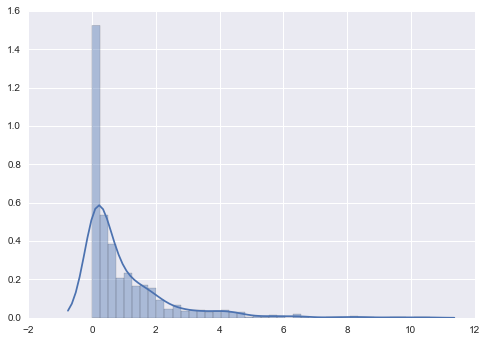

In [13]:
# F Distribution
x = np.random.f(1, 48, size=1000)
sns.distplot(x)

## Chapter 6 - Inference for categorical data

### Notes

#### "Goodness" of fit using chi-square
* Chi-square is commonly used for the following scenarios:
  1. Given a sample of cases that can be classified into several groups/bins, determine if the sample is representative of the general population.
  2. Evalutate whether dat resemble a particular distribution, such as the normal dist or geometric dist.
* e.g., given a set of jurors on a jury, determine if the distribution of races is representative of the population races. Hypothesese:
  * $H_0$: The jurors are a random sample. i.e., there is no racial bias in who serves on a jury, and the observed counts reflect natural sampling fluctuation.
  * $H_A$: The jurors are not randomly sampled. i.e., there is racial bias.
* The chi-square test statistic:
  1. Compute a test statistic for each group/bucket:
    $$ Z_1 = \frac{\text{observed white count - null white count}}{\text{SE of observed white count}} $$
    $$ Z_2 = \frac{\text{observed black count - null black count}}{\text{SE of observed black count}} $$
    ...
  2. Combine all of the standardized differences into a single test statistic to determine if they are irregularly far from zero. We can do this using the sum of squares:
    $$ Z_1^2 + Z_2^2 + Z_3^2 + ... $$
  3. This results in a value we call $χ^2$ or **chi-square**.

#### The chi-square distribution
* Has only one parameter, degrees of freedom (df). $df = k-1$ for `k` groups.

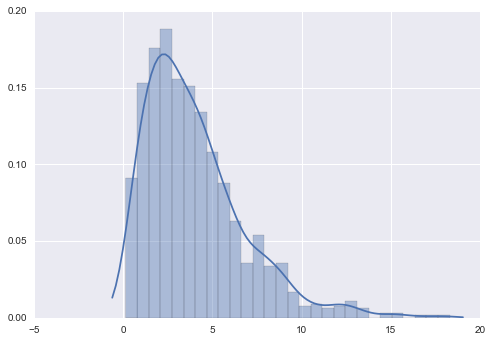

In [7]:
# chi-square Distribution
x = np.random.chisquare(df=4, size=1000)
sns.distplot(x)

#### Two-way tables
* A **one-way table** describes counts for each outcome in a single variable. A **two-way table** describes counts for combinations of outcomes for two variables. e.g.,
  
| Search Algorithm | current | test 1 | test 2 |
|------------------|---------|--------|--------|
| no new search | 3511 | 1749 | 1818 |
| new search | 1489 | 751 | 682 |
<br /><br /><br /><br />
  * note that for each bucket (`current`, `test 1`, `test 2`) there are two possible outcomes (`no new search, `new search`)

* We can compute the **expected counts** of each cell, which are the values we expect to see under the null hypothesis, using the following: $$ \text{Expected Count}_{ij} = \frac{\text{row i total * col j total}}{\text{table total}} $$
* We can use the chi-square test for two-way tables by computing the previously mentioned test statistic for each cell: $$ \sum_{\text{i=1,j=1}}^{\text{n,m}}{\frac{(\text{observed count}_{ij} - \text{expected count}_{ij})^2}{\text{expected count}_{ij}}} $$
* degrees of freedom is calculated as `df = (number of rows - 1) * (number of cols - 1)`

## Chapter 7 - Introduction to linear regression

### Notes
* Assumes that the relationship between two variables `x` and `y` can be modeled by a straight line: $y = β_0 + β_1x$ where $β_0$ and $β_1$ represent two model parameters.
* We call `x` the **explanatory** or **predictor** variable and `y` the response variable.

#### Residuals
* The leftover variation in the data after accounting for the model fit: `Data = Fit + Residual`
  * Each observation/data point has a residual. If the data point is above the regression line, it has a positive residual.
* **Residual plots** are used to visualize the residuals a bit easier. Every data point remains at its horizontal location, but the vertical/y axis is centered around the regression line:

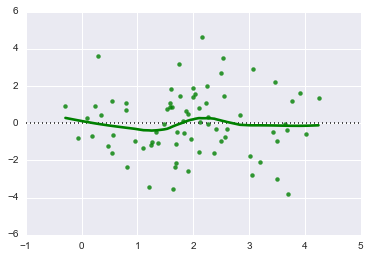

In [11]:
# residual plot
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

sns.residplot(x, y, lowess=True, color="g")

#### Correlation
* Always takes a value between -1 and 1
  * A strong and positive relationship is closer to 1
  * A strong and negative relationship is closer to -1
  * A relationship with no apparent correlation is close to 0
* Describes the strength of the linear relationship between two variables.
* Denoted by `R`.
* Correlation equation: $$ R = \frac{1}{n-1}\sum_{i=1}^n \frac{x_i-\bar{x}}{s_x}\frac{y_i-\bar{y}}{s_y} $$
* ^ yuck! Let's just use software to compute correlation.

#### Least squares regression
* Based on minimizing the residuals
* The slope of the least squares line can be found with $ b_1 = \frac{s_y}{s_x}R $
* Use point-slope form to determine the line: $$ y-\hat{y} = b_1(x-\bar{x}) $$
* We can use **R-squared** ($R^2$) to determine the amount of variation in the response that is explained by the least squares line.

#### Types of outliers in linear regression
* **Leverage**: Points that fall horizontally away from the center of the cloud tend to pull harder on the line, so we call them points with **high leverage**.

## Chapter 8 - Multiple and logistic regression

### Notes

#### Multiple Regression
* Multiple Regression extends two-variable regression to include one response variable (`y`) but many predictors ($x_1$, $x_2$, ...).
* We write multiple regression models as $ \hat{y} = β_0 + β_1x_1 + β_2x_2 + ... + β_kx_k $ for `k` predictors
* **Adjusted $R^2$**: $$ R^2_{adj} = 1 - \frac{Var(e_i)/(n-k-1)}{Var(y_i)/(n-1)} = 1 - \frac{Var(e_i)}{Var(y_i)} * \frac{n-1}{n-k-1} $$ where `n` is the number of cases used to fit the model and `k` is the number of predictor variables

#### Model selection
* "All models are wrong, but some are useful." — George E.P. Box

#### Logistic Regression
* Logistic regression is a type of **generalized linear model (GLM)** for response variables where regular multiple regression does not work well.
* It is a GLM where the outcome is a two-level categorical variable (e.g., `spam` or `ham`)
* First, we model the response variable using a probability distribution (binomial, Poisson, etc.).
* Second, we model the parameter of the distribution using a collection of predictors and a special form of multiple regression.
* The outcome variable of a GLM is denoted by $Y_i$ where the index `i` is used to represent observation `i`.
* Logit transformation: $$ logit(p_i) = log_e (\frac{p_i}{1-p_i}) $$